# Data mining with python

## import necessary library

In [243]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import graphviz
from sklearn import tree, metrics


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## read csv file and show some

In [244]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("./titanic_data_set/train.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## show info to find null values

In [245]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## drop unnecessary columns

In [246]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Sex : male = 1, female = 0
### change 'Sex' column to binary

In [247]:
titanic_df.Sex = (titanic_df.Sex.values == 'male').astype(int)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## convert continuous variable to a categorical variable
### in this case, convert age and fare

In [248]:
titanic_df.Age = pd.cut(titanic_df.Age, 4, labels=[0, 1, 2, 3])
titanic_df.Fare = pd.cut(titanic_df.Fare, 3, labels=[0, 1, 2])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,1,0,0
1,1,1,0,1,1,0,0
2,1,3,0,1,0,0,0
3,1,1,0,1,1,0,0
4,0,3,1,1,0,0,0


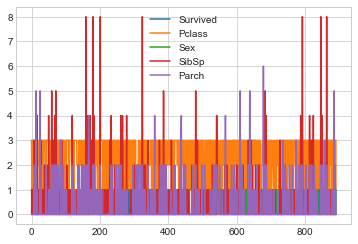

In [249]:
titanic_df.plot()
plt.show()

## split data

In [250]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train = X.loc[0:701]
X_test = X.loc[701:]
y_train = y.loc[0:701]
y_test = y.loc[701:]

In [265]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,1,1,0,0
1,1,0,1,1,0,0
2,3,0,1,0,0,0
3,1,0,1,1,0,0
4,3,1,1,0,0,0


In [266]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [267]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
701,1,1,1,0,0,0
702,3,0,0,0,1,0
703,3,1,1,0,0,0
704,3,1,1,1,0,0
705,2,1,1,0,0,0


In [268]:
y_test.head()

701    1
702    0
703    0
704    0
705    0
Name: Survived, dtype: int64

## fit data in decision tree

In [255]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Pclass    702 non-null int64
Sex       702 non-null int64
Age       557 non-null category
SibSp     702 non-null int64
Parch     702 non-null int64
Fare      702 non-null category
dtypes: category(2), int64(4)
memory usage: 23.7 KB


In [256]:
X_train.Age = X_train.Age.fillna(0)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [262]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Pclass    702 non-null int64
Sex       702 non-null int64
Age       702 non-null category
SibSp     702 non-null int64
Parch     702 non-null int64
Fare      702 non-null category
dtypes: category(2), int64(4)
memory usage: 23.7 KB


In [264]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 701 to 890
Data columns (total 6 columns):
Pclass    190 non-null int64
Sex       190 non-null int64
Age       158 non-null category
SibSp     190 non-null int64
Parch     190 non-null int64
Fare      190 non-null category
dtypes: category(2), int64(4)
memory usage: 6.7 KB


In [269]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [271]:
y_pred = classifier.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## confusion matrix

In [272]:
print(confusion_matrix(y_test, y_pred), label=['Died', 'Survived'])

NameError: name 'y_pred' is not defined

In [273]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'y_pred' is not defined

In [274]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [275]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [276]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("graphviz") 

'graphviz.pdf'

In [277]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

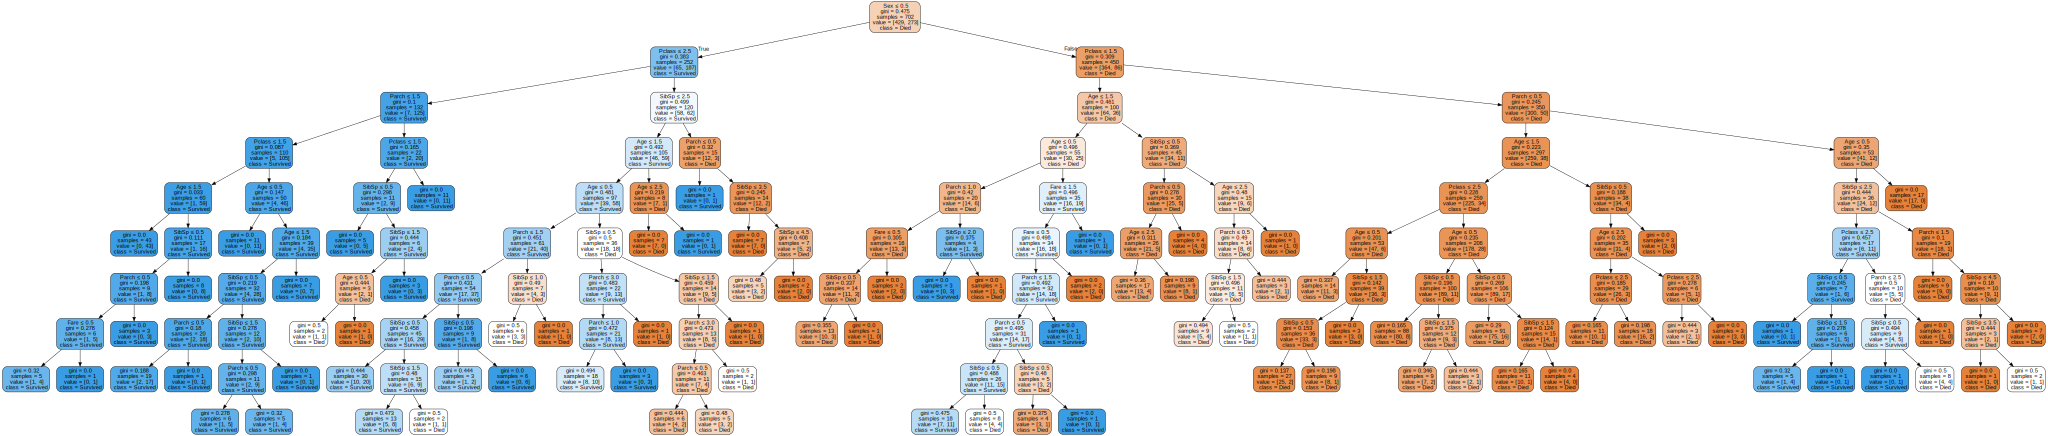

In [278]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=['Died', 'Survived'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)  
graph


In [279]:
titanic_df.Fare.values

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 891
Categories (3, int64): [0 < 1 < 2]

In [280]:
list = {0:0, 1:0, 2:0}
for x in titanic_df.Fare :
    if x == 0 :
        list[0] += 1
    if x == 1 :
        list[1] += 1
    if x == 2 :
        list[2] += 1
list

{0: 871, 1: 17, 2: 3}

In [281]:
titanic_df.Fare.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     1
28     0
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    0
875    0
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    0
888    0
889    0
890    0
Name: Fare, Length: 891, dtype: category
Categories (3, int64): [0 < 1 < 2]>